In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import root_mean_squared_error

## Objective

- Using the pick-up location, drop-off location and distance of the journey we want to predict the duration of the journey
- We will use the 2021 January data to train the model
- In order to clean the dataset, we will only keep trip durations that are between 1 and 60 minutes
- We will use the 2021 February model to validate the model

In [42]:
def load_df(filepath) -> pd.DataFrame:
    df = pd.read_parquet(filepath)
    df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
    df['duration'] = df['duration'].apply(lambda dt: dt.total_seconds()/60)
    df = df[(df['duration'] > 1) & (df['duration'] < 60)]
    df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)
    return df
load_df('data/green_tripdata_2021-01.parquet')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333,43_151
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000,166_239
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667,41_42
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333,168_75
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667,75_75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000,81_90
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000,35_213
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000,74_69
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000,168_215


In [55]:
categoric = ['PU_DO']
numeric = ['trip_distance']

train_df = load_df('data/green_tripdata_2021-01.parquet')
train_df[categoric] = train_df[categoric].astype(str)
train_dict = train_df[categoric + numeric].to_dict(orient="records")

val_df = load_df('data/green_tripdata_2021-02.parquet')
val_df[categoric] = val_df[categoric].astype(str)
val_dict = val_df[categoric + numeric].to_dict(orient="records")

dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
y_train = train_df.duration.values

X_val = dv.transform(val_dict)
y_val = val_df.duration.values

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_predict = lr.predict(X_val)

/tmp/ipykernel_65840/3814325074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, label='prediction')
/tmp/ipykernel_65840/3814325074.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


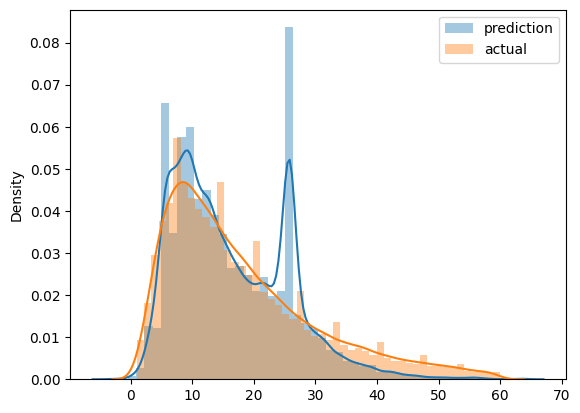

In [59]:
sns.distplot(y_predict, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [60]:
root_mean_squared_error(y_val, y_predict)

7.701665753537339

In [62]:
import pickle

with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)